## Import Module

The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [39]:
import numpy as np
import pandas as pd 
import nltk
import re

import nltk
nltk.download('wordnet')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

import itertools
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load Stopwords, Stemmer, and Lemmatizer

In [0]:
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer() 

## Define the replace_puncts, strip_chars, and puncts

this list and arrays are going to be used in defining the functions

In [0]:
replace_puncts = {'`': "'", '′': "'", '“':'"', '”': '"', '‘': "'"}

strip_chars = [',', '.', '"', ':', ')', '(', '-', '|', ';', "'", '[', ']', '>', '=', '+', '\\', '•',  '~', '@', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

puncts = ['!', '?', '$', '&', '/', '%', '#', '*','£']

## Define functions that clean, lemmatize, process text, and remove stem words from text

The following code defines three functions:

  * `clean_text`, which convert word to lower case and replace some characters
  * `stem`, steam each word in the given text
  * `lemm`, which will lemmatize word
  * `stopwords1`, which remove the stopwords
  * `text_processing`, which incorporate all the function above into one function that will be used to process text later

In [0]:
def clean_text(x):
    x = str(x)
    x = x.lower()
    x = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", x)
    for k, v in replace_puncts.items():
        x = x.replace(k, f' {v} ')
        
    for punct in strip_chars:
        x = x.replace(punct, ' ') 
    
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
        
    x = x.replace(" '", " ")
    x = x.replace("' ", " ")
   
    return x

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

def lemm(text):    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text) 

def text_processing(X):
    X=X.apply(clean_text)
    X=X.apply(stemming)
    X=X.apply(lemm)
    return X

## Loading Dataset

in this project, we use data from Kaggle :  [Fake and Real News Dasaset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset) 


In [43]:
fake_dataset_url = 'https://raw.githubusercontent.com/Bangkit-2-Jakarta-Team/Fake-News-Detection/master/Datasets/Fake.csv'
true_dataset_url='https://raw.githubusercontent.com/Bangkit-2-Jakarta-Team/Fake-News-Detection/master/Datasets/True.csv'

df_fake = pd.read_csv(fake_dataset_url)
df_true = pd.read_csv(true_dataset_url)
df_fake['is_true'] = "FAKE"
df_true['is_true'] = "REAL"

# make ratio of true and fake dataset is same
df_length = min(len(df_fake), len(df_true))
df_fake = df_fake[:df_length]
df_true = df_true[:df_length]

#Merge two dataframe into one
df_data = pd.concat([df_fake,df_true])

#Randomizing data sequence to scatter data
df_data = shuffle(df_data).reset_index(drop=True)

#Showing sample
df_data.sample(5)

,title,text,subject,date,is_true
31813,Senate passes bill to boost travel security af...,WASHINGTON (Reuters) - The Senate on Tuesday o...,politicsNews,"April 19, 2016",REAL
31533,"Kyrgyzstan vote count problems ""significant"": ...",BISHKEK (Reuters) - European observers said on...,worldnews,"October 16, 2017",REAL
14734,Heckler Screams ‘F*ck Hillary’ At Clinton Ral...,Sometimes you ve got to laugh especially if ...,News,"September 15, 2016",FAKE
10037,Obama 'concerned' about U.S. State Department ...,WARSAW (Reuters) - U.S. President Barack Obama...,politicsNews,"July 9, 2016",REAL
11937,#NFL TWEETS About Tom Brady’s Deflategate Appe...,Why is the NFL ignoring this situation? Are th...,politics,"Jul 13, 2016",FAKE


## The Features Used

In [0]:
x = df_data['text']
y = df_data['is_true']

## Generating Wordcloud that show most common word in News Title

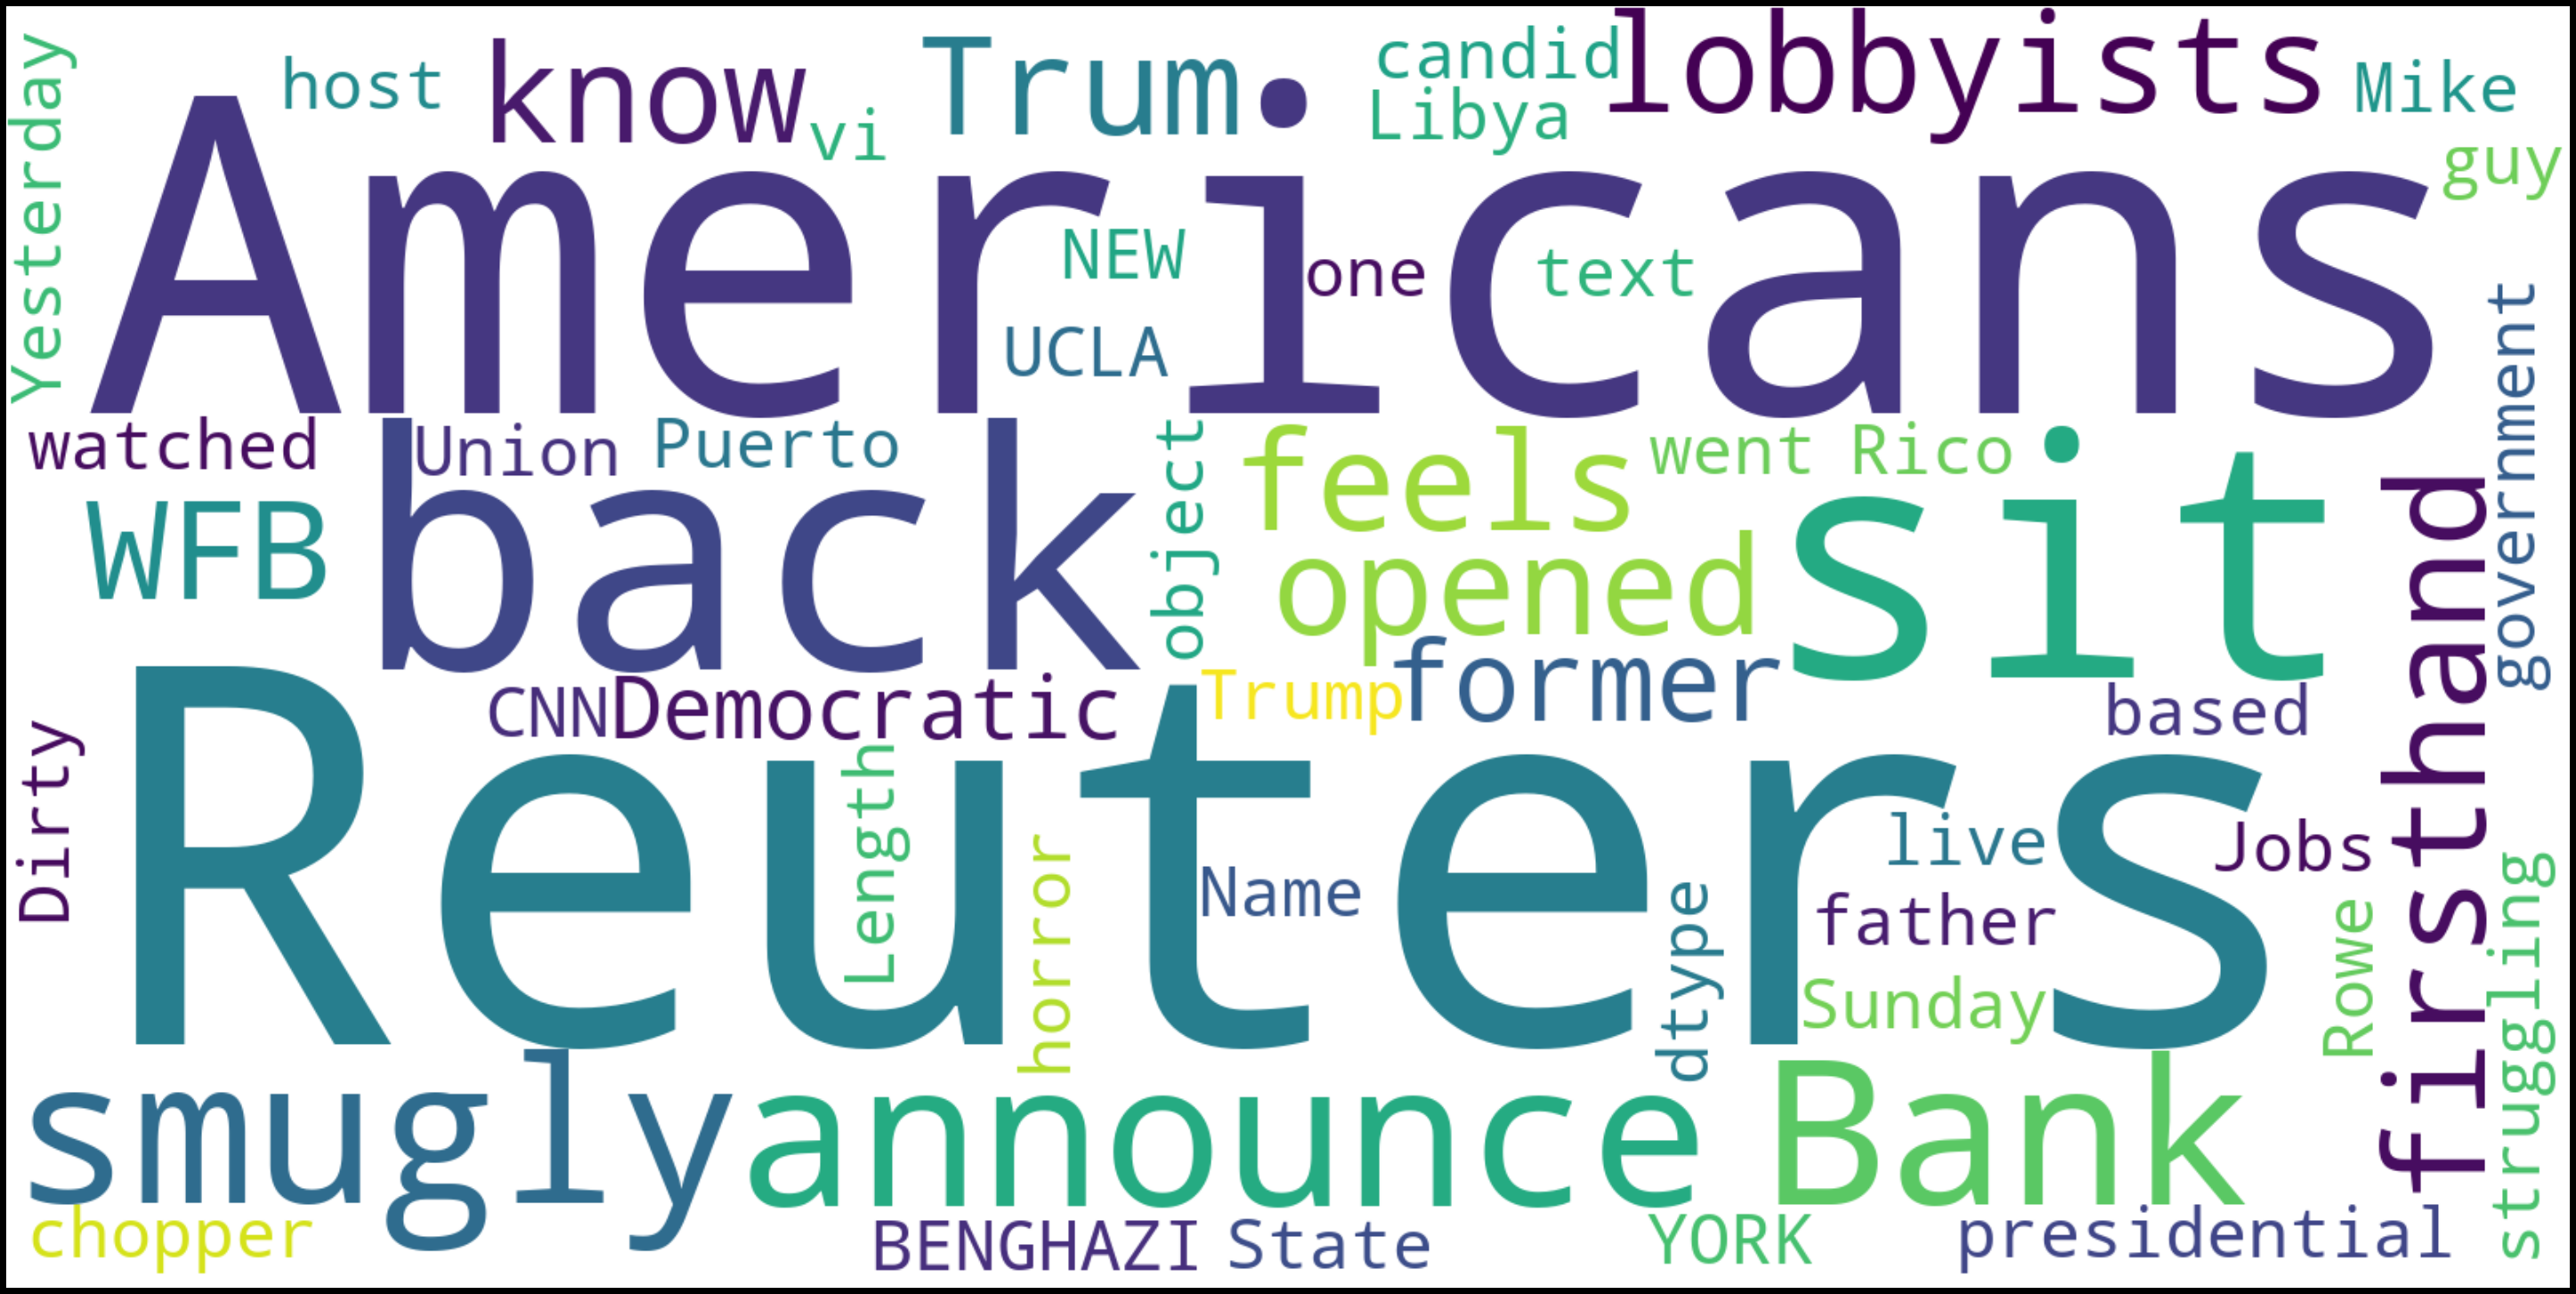

In [45]:
#Counting Unique word to generate WordCloud
text_wc = x
wordcloud= WordCloud(
    width =1600,
    height = 800,
    background_color='white',
    stopwords=STOPWORDS).generate(str(text_wc))
fig = plt.figure(
    figsize = (40,30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Clean title feature text

In [0]:
#Clean data using text_processing() function
clean_x = text_processing(x)

## Split train and test dataset

In [0]:
x_train, x_test, y_train, y_test = train_test_split(clean_x, y, test_size=0.3, random_state = 42)

## TFIDF Vectorizer

In [0]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(x_test)

## Define plot function

In [0]:
def plot_confusion_matrix(cm, classes, name,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+" "+name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Train SVM Model

In [52]:
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

## Train NB Model

In [53]:
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluate model accuracy

In [0]:
# SVM
predSVM = linear_clf.predict(tfidf_test)
scoreSVM = metrics.accuracy_score(y_test, predSVM)

# NB
predNB = clf.predict(tfidf_test)
scoreNB = metrics.accuracy_score(y_test, predNB)

## Result

In [55]:
print("accuracy SVM:   %0.3f" % scoreSVM)
print("accuracy NB:   %0.3f" % scoreNB)

accuracy SVM:   0.992
accuracy NB:   0.917


## Visualization SVM


Confusion matrix, without normalization


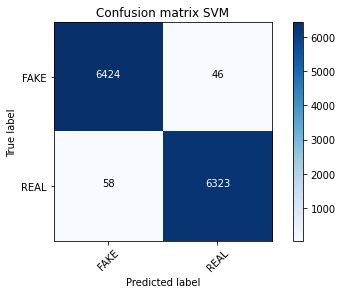

In [56]:
cmSVM = metrics.confusion_matrix(y_test, predSVM, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cmSVM, ['FAKE', 'REAL'], "SVM")

## Visualization NB

Confusion matrix, without normalization


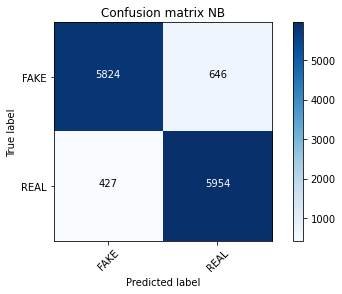

In [57]:
cmNB = metrics.confusion_matrix(y_test, predNB, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cmNB, ['FAKE', 'REAL'], "NB")

## Comparison

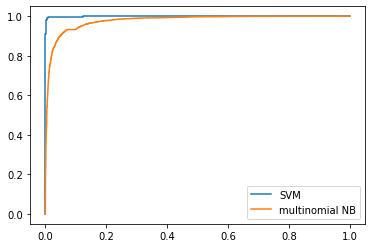

In [60]:
plt.figure(0).clf()

for model, name in [ (linear_clf, 'SVM'),
                     (clf, 'multinomial NB')]:
    if 'multinomial' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    else: 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred, pos_label='REAL')
    plt.plot(fpr,tpr,label="{}".format(name))

plt.legend(loc=0)